# Exploratory data analysis

In this notebook, we perform a data exploration of the last.fm dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

## Load the dataframes

In [2]:
col_names_user = ['user-mboxsha1', 'gender', 'age', 'country', 'signup']
df_user = pd.read_csv('../data/usersha1-profile.tsv', sep='\t', names=col_names_user)
df_user = df_user.rename(columns={"user-mboxsha1":"user_id"})
df_user.head()

,user_id,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [3]:
len(df_user)

359347

In [4]:
col_names_consumption = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']
df_consumption = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=col_names_consumption)
df_consumption = df_consumption.rename(columns={"user-mboxsha1":"user_id", 
                                                "musicbrainz-artist-id":"artist_id",
                                                "artist-name":"artist_name",})
df_consumption.head()

,user_id,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [5]:
len(df_consumption)

17535655

### Null values

In [6]:
df_user.isna().sum()

user_id        0
gender     32775
age        74900
country        0
signup         0
dtype: int64

In [7]:
df_consumption.isna().sum()

user_id             0
artist_id      226137
artist_name       204
plays               0
dtype: int64

In [8]:
df_consumption[df_consumption["artist_id"].isna()].head()

,user_id,artist_id,artist_name,plays
158,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,NaN,rock universal,14
241,00007a47085b9aab8af55f52ec8846ac479ac4fe,NaN,apes & androids,67
441,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,NaN,fondo flamenco,3
499,0001399387da41d557219578fb08b12afa25ab67,NaN,id software,31
605,0001a57568309b287363e72dc682e9a170ba6dc2,NaN,haircut 100,83


## Users

### Age

In [9]:
df_user.describe()

,age
count,284447.000000
mean,25.098046
std,21.665742
min,-1337.000000
25%,20.000000
50%,23.000000
75%,28.000000
max,1002.000000


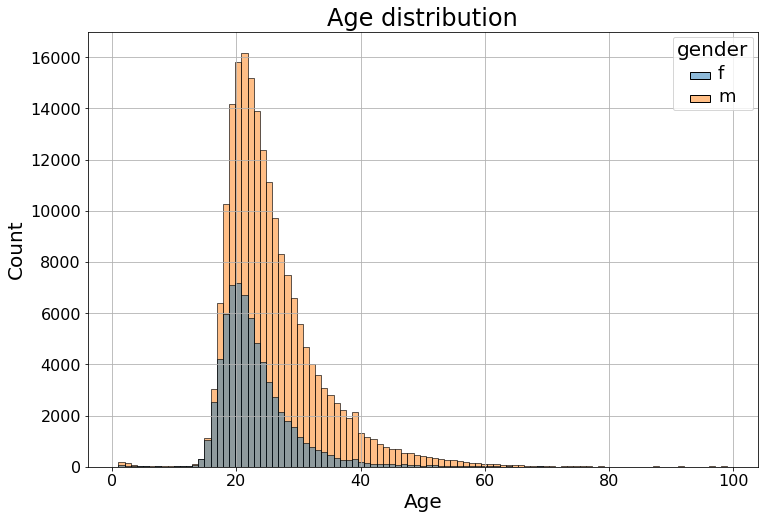

In [10]:
f = plt.figure(figsize=(12,8)) 

ax = sns.histplot(data=df_user[df_user.age.isin(np.arange(0,100))], x="age", bins=99, hue="gender")

plt.title("Age distribution", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.grid()
# plt.savefig("age_distribution.pdf", bbox_inches="tight")

plt.show()

In [11]:
(df_user.age < 5).sum()

936

In [12]:
(df_user.age > 100).sum()

1081

In [13]:
(df_user.age > 110).sum()

4

### Country

In [14]:
df_user.country.value_counts()

United States         67044
Germany               31651
United Kingdom        29902
Poland                20987
Russian Federation    19833
                      ...  
French Guiana             4
Gambia                    3
Palau                     3
Liberia                   3
Benin                     3
Name: country, Length: 239, dtype: int64

In [15]:
# Fraction of users coming from the US
(df_user.country == "United States").sum()/len(df_user)

0.18657175376446722

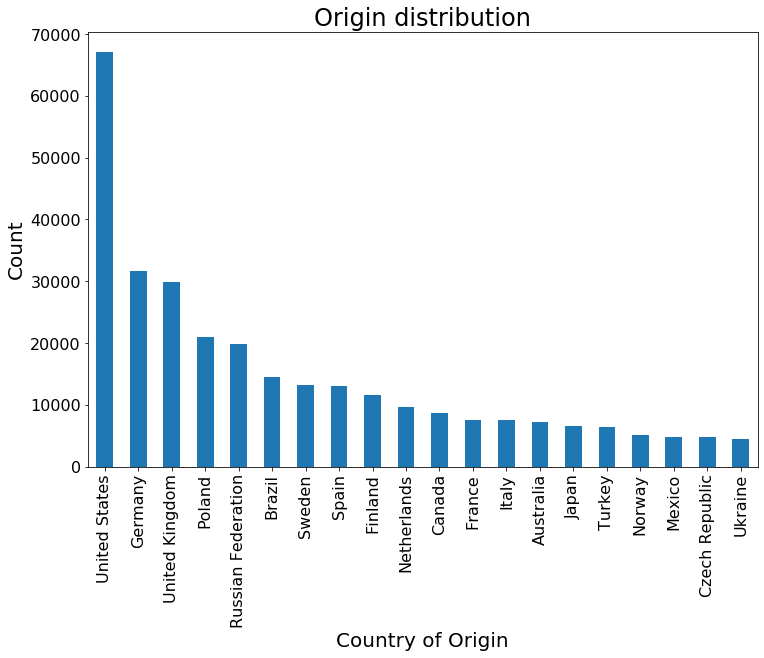

In [16]:
f = plt.figure(figsize=(12,8)) 

df_user.country.value_counts()[:20].plot(kind="bar")

plt.title("Origin distribution", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Country of Origin', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

### Gender

m    241642
f     84930
Name: gender, dtype: int64


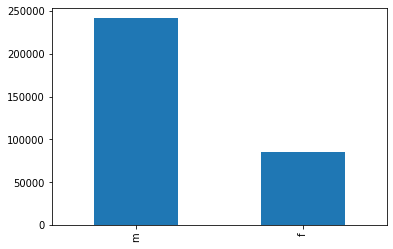

In [17]:
df_user.gender.value_counts().plot(kind="bar")
print(df_user.gender.value_counts())
plt.show()

### User_id

In [18]:
print(len(df_user["user_id"]))
df_user["user_id"].nunique()

359347


359347

--> one row by user

## Consumption

### Plays

In [19]:
df_consumption.describe()

,plays
count,1.753566e+07
mean,2.151932e+02
std,6.144815e+02
min,0.000000e+00
25%,3.500000e+01
50%,9.400000e+01
75%,2.240000e+02
max,4.191570e+05


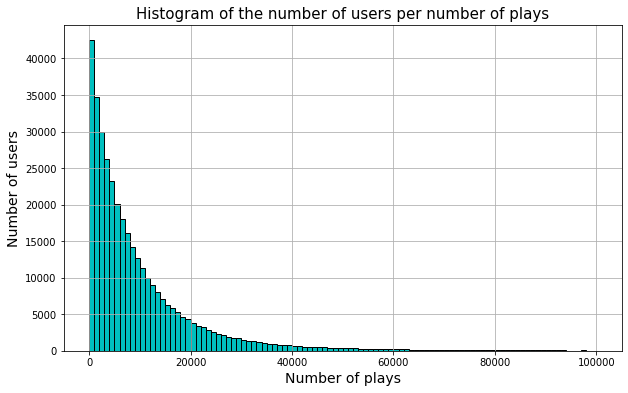

In [20]:
grouped_user = df_consumption[['user_id', 'plays']].groupby('user_id').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)
# Only show users having less than 100'000 plays
grouped_user = grouped_user[grouped_user['plays'] <= 100000]

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
# plt.yscale('log')
plt.title('Histogram of the number of users per number of plays', fontsize=15)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.savefig("histo_plays_per_user.pdf", bbox_inches="tight")
plt.show()

In [21]:
(df_consumption.plays > 100000).sum()

46

### Artist_name

In [22]:
df_consumption["artist_name"].nunique()

292363

In [23]:
df_consumption[df_consumption.plays > 60000]

,user_id,artist_id,artist_name,plays
27358,006261139d787c1e43b4c69d304f2772367c1005,f9ef7a22-4262-4596-a2a8-1d19345b8e50,garbage,62054
43276,00a20b9791abd8b29903a8a43e343ae93a98d9fd,ac9a487a-d9d2-4f27-bb23-0f4686488345,lil wayne,107758
191656,02ccf45baa7fe62f0935b8a6a64ff8869a7b0387,b202beb7-99bd-47e7-8b72-195c8d72ebdd,christina aguilera,135392
556800,082279c9db5330c25a4e0ceae275a9fc79c753c4,847e8a0c-cc20-4213-9e16-975515c2a926,céline dion,86132
634605,09490bb4034066761d59985dbe93e0119fcc1006,39ab1aed-75e0-4140-bd47-540276886b60,oasis,74522
...,...,...,...,...
17071986,f929ec83f45ed176dda7c98ffa576fd3a9cc862a,197450cd-0124-4164-b723-3c22dd16494d,frank sinatra,67910
17106848,f9b1fbe1c54551d835bed048474652f77c6f6bc4,f4a31f0a-51dd-4fa7-986d-3095c40c5ed9,evanescence,62164
17206853,fb30d581e1ddf82812e7bdfae7a7d965a6cf54bc,5dfdca28-9ddc-4853-933c-8bc97d87beec,marilyn manson,110098
17305207,fca2614e3834feb94726f6334b4948d776a767a1,39ab1aed-75e0-4140-bd47-540276886b60,oasis,60618


In [24]:
grouped = df_consumption[['artist_name', 'plays']].groupby('artist_name').sum()
grouped = grouped.sort_values(by='plays', ascending=False)
grouped

,plays
artist_name,
the beatles,30466827
radiohead,27426234
coldplay,16686772
pink floyd,15943557
metallica,15481852
...,...
alex m.o.r.p.h.|rank 1,1
el tigre lupercio,1
alex m.o.r.p.h. vs eric prydz,1


### artist_id

In [25]:
df_consumption["artist_id"].nunique()

160112

In [26]:
df_consumption[df_consumption['artist_name'] == "guns & roses"]

,user_id,artist_id,artist_name,plays
12771867,babe634390fc14be80937141c97a4bebbe99e203,eeb1195b-f213-4ce1-b28c-8565211f8e43,guns & roses,7


In [27]:
df_consumption[df_consumption['artist_id'] == "eeb1195b-f213-4ce1-b28c-8565211f8e43"].groupby(["artist_name"]).count()

,user_id,artist_id,plays
artist_name,,,
guns & roses,1,1,1
guns 'n' roses,4,4,4
guns and roses.,1,1,1
guns n roses,11224,11224,11224
guns n' roses,12725,12725,12725
guns n'roses,1,1,1
guns nroses,1,1,1
guns n´roses,1,1,1
gunsnroses,1,1,1


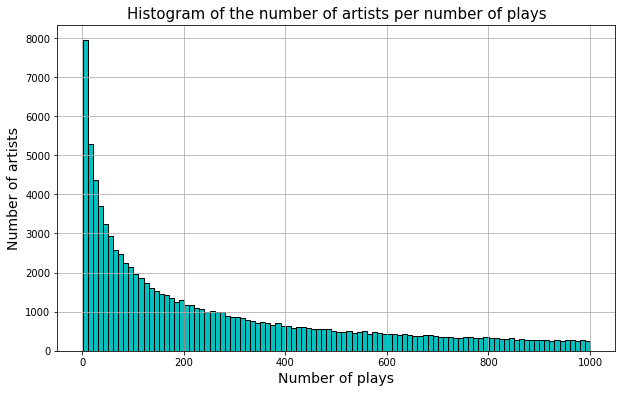

In [28]:
grouped_artist = df_consumption[['artist_id', 'plays']].groupby('artist_id').sum()
grouped_artist = grouped_artist.sort_values(by='plays', ascending=False)
grouped_artist = grouped_artist[grouped_artist['plays'] <= 1000]

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
# plt.yscale('log')
plt.title('Histogram of the number of artists per number of plays', fontsize=15)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
# plt.savefig("histo_plays_per_artist.pdf", bbox_inches="tight")

plt.show()

### user_id

In [29]:
df_consumption["user_id"].nunique()

358868